 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [13]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Reading whale returns
wr_df = pd.read_csv("Resources/whale_returns.csv")
wr_df["Date"] = pd.to_datetime(wr_df["Date"])
wr_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [15]:
# Count nulls
wr_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
wr_df.dropna(inplace = True)
wr_df = wr_df.set_index('Date')
wr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [17]:
# Reading algorithmic returns
ar_df = pd.read_csv("Resources/algo_returns.csv")
ar_df["Date"] = pd.to_datetime(ar_df["Date"])
ar_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [18]:
# Count nulls
ar_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [19]:
# Drop nulls
ar_df.dropna(inplace = True)
ar_df = ar_df.set_index("Date")
ar_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv("Resources/sp500_history.csv")
sp500_df["Date"]=pd.to_datetime(sp500_df["Date"])
sp500_df.head()

,Date,Close
0,2019-04-23,$2933.68
1,2019-04-22,$2907.97
2,2019-04-18,$2905.03
3,2019-04-17,$2900.45
4,2019-04-16,$2907.06


In [21]:
# Check Data Types
sp500_df.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [22]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].astype("str")
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

C:\Users\glzvi\AppData\Local\Temp\ipykernel_15688\2296030881.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")


Date     datetime64[ns]
Close           float64
dtype: object

In [23]:
# Calculate Daily Returns
sp500_df["Close"] = sp500_df["Close"].pct_change()
sp500_df.head()

,Date,Close
0,2019-04-23,NaN
1,2019-04-22,-0.008764
2,2019-04-18,-0.001011
3,2019-04-17,-0.001577
4,2019-04-16,0.002279


In [24]:
# Drop nulls
sp500_df.dropna(inplace = True)
sp500_df = sp500_df.sort_values(by = ["Date"], axis=0, ascending=True)
sp500_df

,Date,Close
1648,2012-10-01,-0.000872
1647,2012-10-02,-0.003611
1646,2012-10-03,-0.007123
1645,2012-10-04,0.000322
1644,2012-10-05,0.003469
...,...,...
5,2019-04-15,-0.000509
4,2019-04-16,0.002279
3,2019-04-17,-0.001577
2,2019-04-18,-0.001011


In [25]:
sp500_df = sp500_df.set_index("Date")

In [26]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.rename(columns = {"Close": "S&P500 Returns"})
sp500_df

,S&P500 Returns
Date,
2012-10-01,-0.000872
2012-10-02,-0.003611
2012-10-03,-0.007123
2012-10-04,0.000322
2012-10-05,0.003469
...,...
2019-04-15,-0.000509
2019-04-16,0.002279
2019-04-17,-0.001577


## Combine Whale, Algorithmic, and S&P 500 Returns

In [27]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combined_Returns = pd.concat([sp500_df, ar_df, wr_df], axis = "columns", join = "inner")
Combined_Returns

,S&P500 Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,0.004408,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.001195,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.014378,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.003929,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.017254,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...,...,...
2019-04-15,-0.000509,-0.004331,-0.004572,-0.001422,-0.001156,0.000398,-0.010492
2019-04-16,0.002279,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837
2019-04-17,-0.001577,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date', ylabel='Daily Returns'>

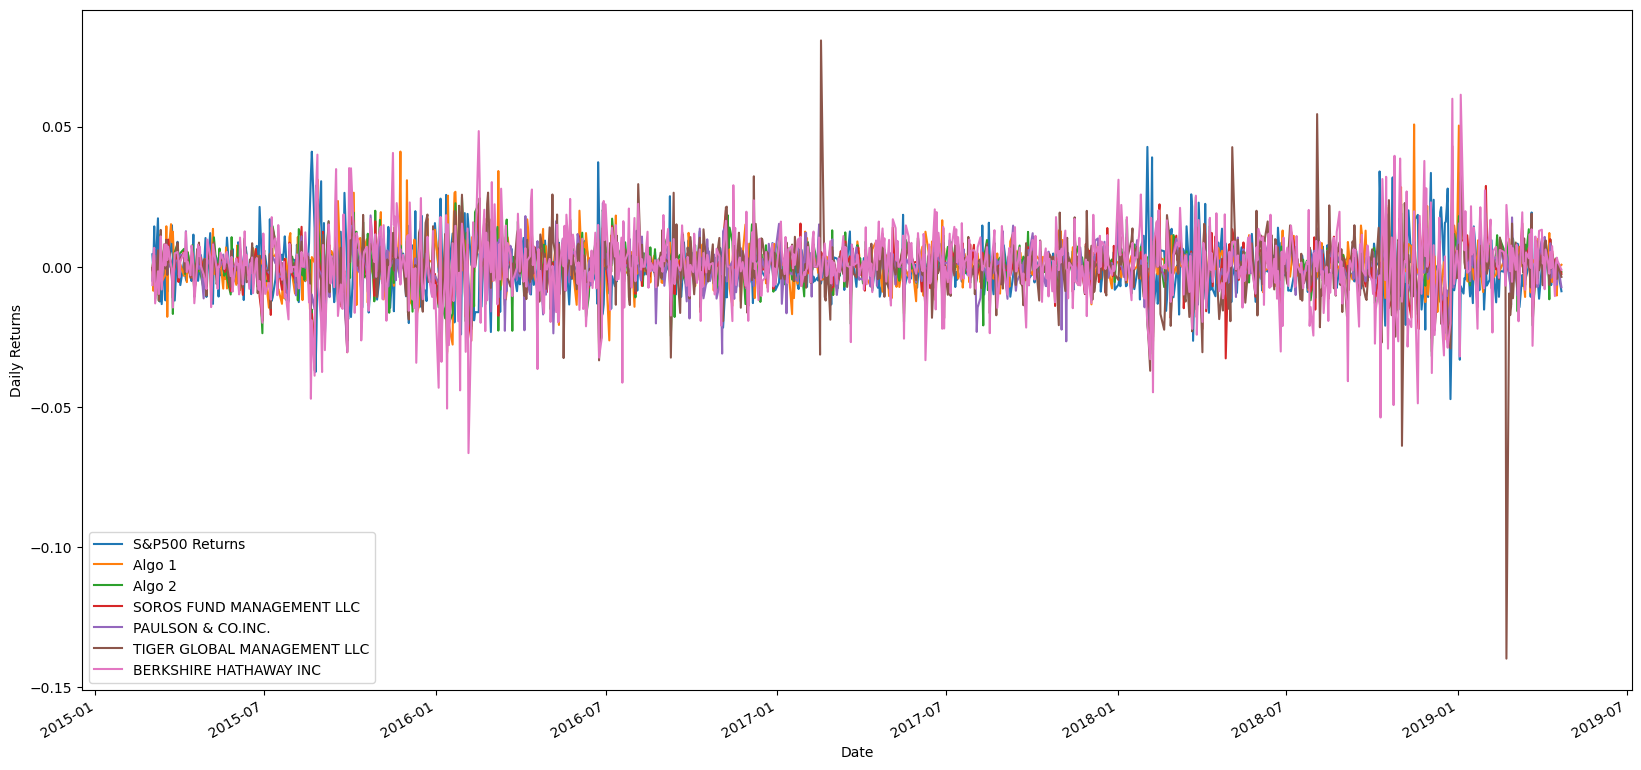

In [28]:
# Plot daily returns of all portfolios
Combined_Returns.plot(xlabel = "Date", ylabel = "Daily Returns", figsize=(20,10))

#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date', ylabel='Cumulative Returns'>

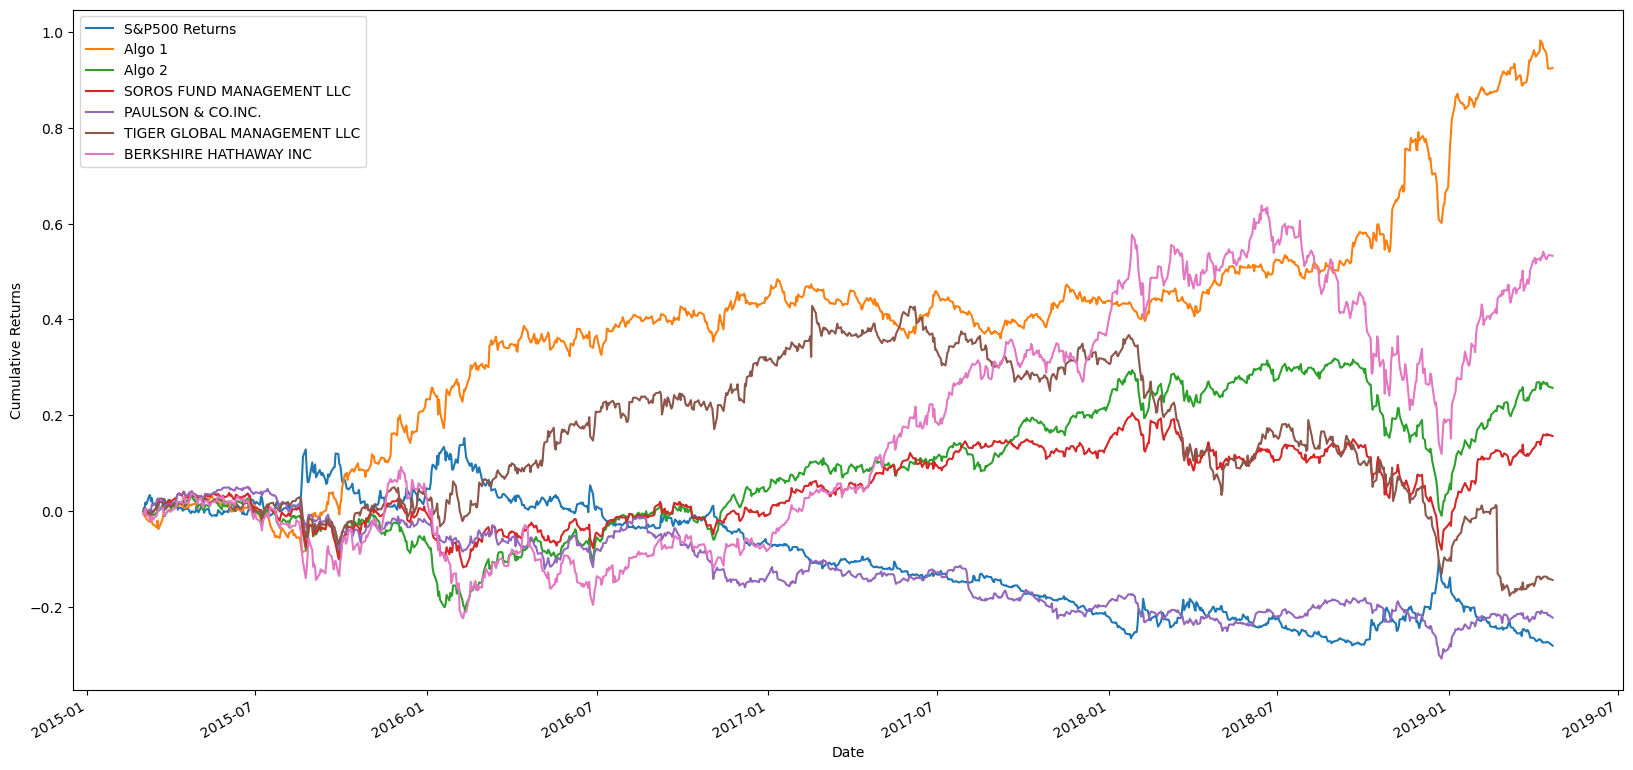

In [29]:
# Calculate cumulative returns of all portfolios
Cumulative_Returns = (1 + Combined_Returns).cumprod() - 1
Cumulative_Returns
# Plot cumulative returns
Cumulative_Returns.plot(xlabel = "Date", ylabel = "Cumulative Returns", figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

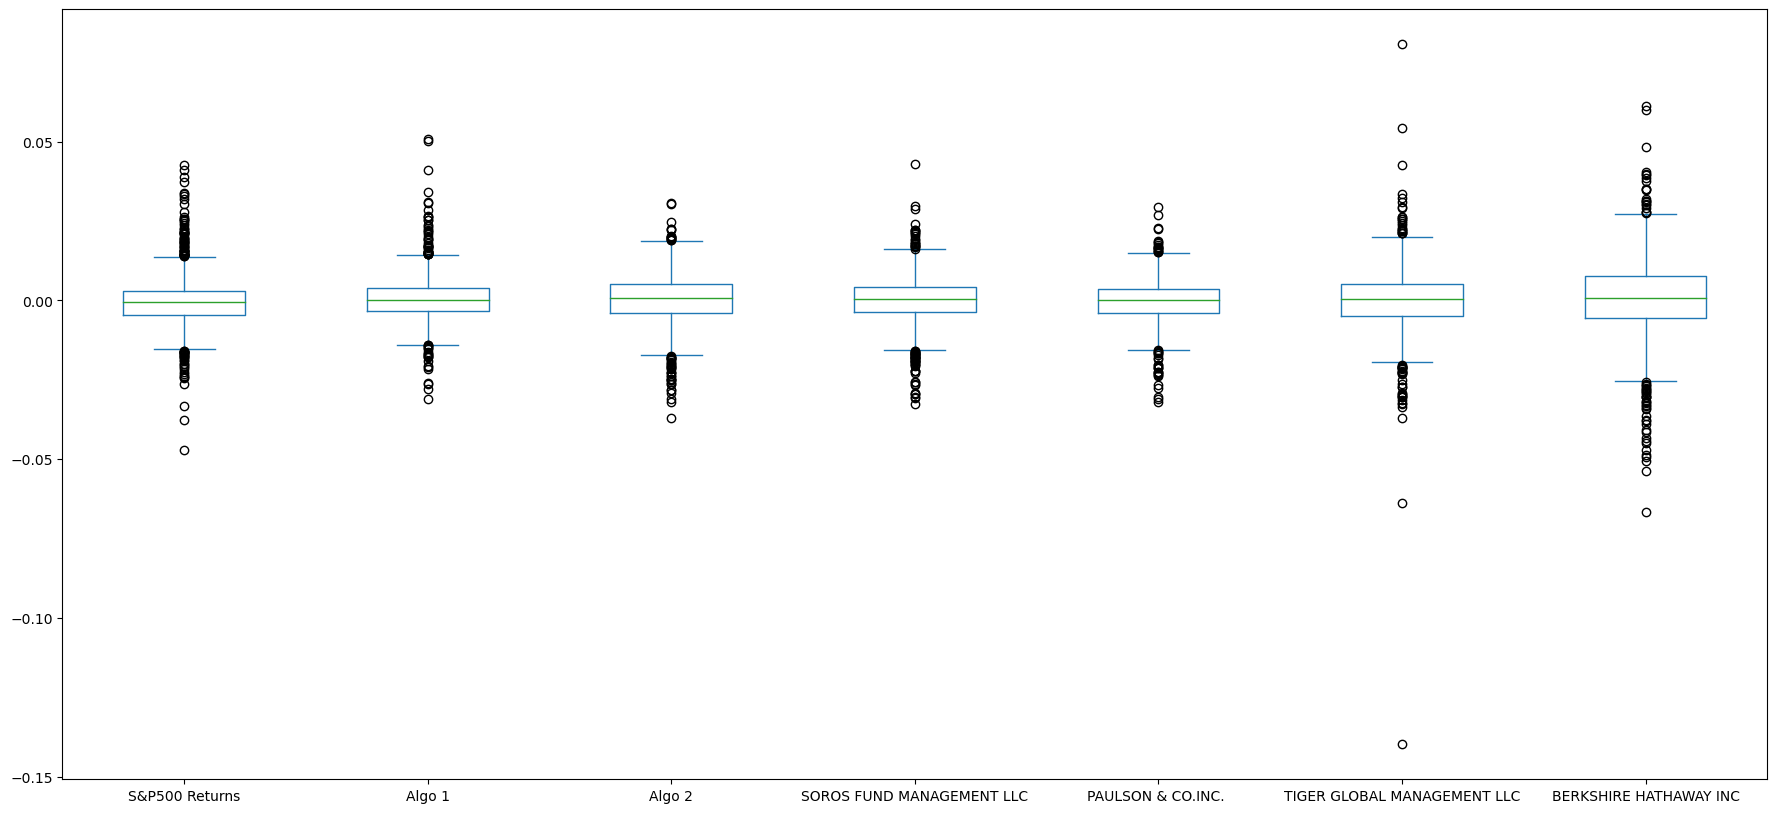

In [30]:
# Box plot to visually show risk
Combined_Returns.plot.box(figsize= (22,10))

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
Volatility = Combined_Returns.std()
Volatility

S&P500 Returns                 0.008587
Algo 1                         0.007623
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [32]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
Volatility.sort_values(inplace=True)
Volatility

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P500 Returns                 0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
Annual_Volatility = Combined_Returns.std() * np.sqrt(252)
Annual_Volatility.sort_values(inplace=True)
Annual_Volatility

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P500 Returns                 0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: ylabel='Frequency'>

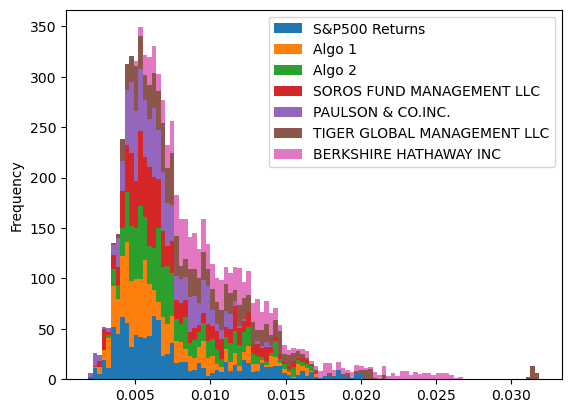

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
Rolling_StD = Combined_Returns.rolling(window=21).std()
# Plot the rolling standard deviation
Rolling_StD.plot.hist(stacked=True, bins = 100)

### Calculate and plot the correlation

<Axes: >

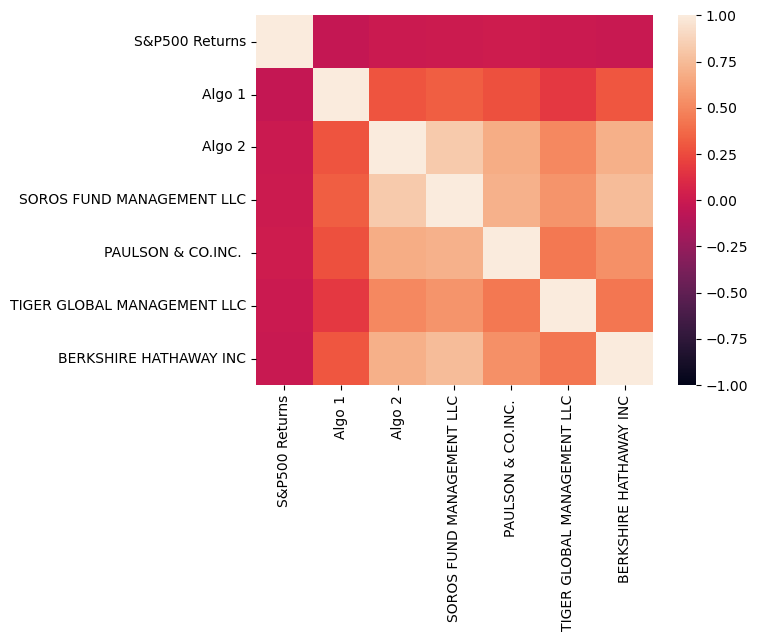

In [35]:
# Calculate the correlation
Correlation = Combined_Returns.corr()
Correlation
# Display de correlation matrix
import seaborn as sns
sns.heatmap(Correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [36]:
# Calculate covariance of a single portfolio
Covariance = Combined_Returns["Algo 1"].cov(Combined_Returns["S&P500 Returns"])
# Calculate variance of S&P 500
Variance = Combined_Returns["S&P500 Returns"].var()

# Computing beta
Algo1_Beta = Covariance/Variance

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [37]:
# Use `ewm` to calculate the rolling window
ewma_Algo1 = Combined_Returns["Algo 1"].ewm(span=21).std()
ewma_Algo2 = Combined_Returns["Algo 2"].ewm(span=21).std()
ewma_Soros = Combined_Returns["SOROS FUND MANAGEMENT LLC"].ewm(span=21).std()
ewma_Tiger = Combined_Returns["TIGER GLOBAL MANAGEMENT LLC"].ewm(span=21).std()
ewma_Berkshire = Combined_Returns["BERKSHIRE HATHAWAY INC"].ewm(span=21).std()
ewma_Paulson = Combined_Returns["PAULSON & CO.INC."].ewm(span=21).std()

print(ewma_Algo1)
print(ewma_Algo2)
print(ewma_Soros)
print(ewma_Tiger)
print(ewma_Berkshire)


KeyError: 'PAULSON & CO.INC.'

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Annualized Sharpe Ratios
sharpe_ratio = np.sqrt(252) * (Combined_Returns.mean() / Combined_Returns.std())

In [ ]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---Both Algo 1 and 2 outperformed S&P 500

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [65]:
# Reading data from 1st stock
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

Apple = "AAPL"
Amazon = "AMZN"
Microsoft = "MSFT"
start_date = "2018-01-01"
end_date = "2018-12-31"

apple_data = pdr.get_data_yahoo(Apple, start_date, end_date)
apple_data = apple_data.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])
apple_data = apple_data.rename(columns={"Close":"Apple"})
apple_data

[*********************100%***********************]  1 of 1 completed


,Apple
Date,
2018-01-02,43.064999
2018-01-03,43.057499
2018-01-04,43.257500
2018-01-05,43.750000
2018-01-08,43.587502
...,...
2018-12-21,37.682499
2018-12-24,36.707500
2018-12-26,39.292500


In [66]:
# Reading data from 2nd stock
amazon_data = pdr.get_data_yahoo(Amazon, start_date, end_date)
amazon_data = amazon_data.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])
amazon_data = amazon_data.rename(columns={"Close":"Amazon"})
amazon_data

[*********************100%***********************]  1 of 1 completed


,Amazon
Date,
2018-01-02,59.450500
2018-01-03,60.209999
2018-01-04,60.479500
2018-01-05,61.457001
2018-01-08,62.343498
...,...
2018-12-21,68.872498
2018-12-24,67.197998
2018-12-26,73.544998


In [67]:
# Reading data from 3rd stock
microsoft_data = pdr.get_data_yahoo(Microsoft, start_date, end_date)
microsoft_data = microsoft_data.drop(columns = ["Open", "High", "Low", "Adj Close", "Volume"])
microsoft_data = microsoft_data.rename(columns={"Close":"Microsoft"})
microsoft_data

[*********************100%***********************]  1 of 1 completed


,Microsoft
Date,
2018-01-02,85.949997
2018-01-03,86.349998
2018-01-04,87.110001
2018-01-05,88.190002
2018-01-08,88.279999
...,...
2018-12-21,98.230003
2018-12-24,94.129997
2018-12-26,100.559998


In [68]:
# Combine all stocks in a single DataFrame
portfolio = pd.concat([microsoft_data, apple_data, amazon_data], axis= 1)
portfolio

,Microsoft,Apple,Amazon
Date,,,
2018-01-02,85.949997,43.064999,59.450500
2018-01-03,86.349998,43.057499,60.209999
2018-01-04,87.110001,43.257500,60.479500
2018-01-05,88.190002,43.750000,61.457001
2018-01-08,88.279999,43.587502,62.343498
...,...,...,...
2018-12-21,98.230003,37.682499,68.872498
2018-12-24,94.129997,36.707500,67.197998
2018-12-26,100.559998,39.292500,73.544998


In [69]:
# Reset Date index


In [70]:
# Reorganize portfolio data by having a column per symbol


In [71]:
# Calculate daily returns
daily_returns = portfolio.pct_change()
# Drop NAs
daily_returns = daily_returns.dropna()
# Display sample data
daily_returns

,Microsoft,Apple,Amazon
Date,,,
2018-01-03,0.004654,-0.000174,0.012775
2018-01-04,0.008801,0.004645,0.004476
2018-01-05,0.012398,0.011385,0.016163
2018-01-08,0.001020,-0.003714,0.014425
2018-01-09,-0.000680,-0.000115,0.004676
...,...,...,...
2018-12-21,-0.032312,-0.038896,-0.057077
2018-12-24,-0.041739,-0.025874,-0.024313
2018-12-26,0.068310,0.070422,0.094452


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [72]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)
# Display sample data
weighted_returns

Date
2018-01-03    0.005752
2018-01-04    0.005974
2018-01-05    0.013315
2018-01-08    0.003910
2018-01-09    0.001294
                ...   
2018-12-21   -0.042762
2018-12-24   -0.030642
2018-12-26    0.077728
2018-12-27   -0.002207
2018-12-28    0.001304
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [74]:
# Join your returns DataFrame to the original returns DataFrame
Compare_Portfolios = pd.concat([Combined_Returns, daily_returns], axis = 1)

In [76]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
Compare_Portfolios = Compare_Portfolios.dropna()
Compare_Portfolios

,S&P500 Returns,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Microsoft,Apple,Amazon
Date,,,,,,,,,,
2018-01-03,-0.004012,-0.000890,0.008175,0.004658,0.000027,0.001979,0.005676,0.004654,-0.000174,0.012775
2018-01-04,-0.006985,-0.000914,0.004294,-0.000914,0.004196,0.010743,0.004065,0.008801,0.004645,0.004476
2018-01-05,-0.001660,-0.003839,0.006405,0.004072,0.000823,0.000737,0.022023,0.012398,0.011385,0.016163
2018-01-08,-0.001301,0.001653,0.000658,0.004473,-0.003739,0.005085,0.003435,0.001020,-0.003714,0.014425
2018-01-09,0.001113,-0.001004,-0.002091,-0.001028,0.000872,0.001789,0.000708,-0.000680,-0.000115,0.004676
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,0.027868,-0.017888,-0.021636,-0.022720,-0.020980,-0.022570,-0.028892,-0.032312,-0.038896,-0.057077
2018-12-24,-0.047250,-0.003938,-0.014745,-0.019152,-0.011786,-0.029165,-0.020181,-0.041739,-0.025874,-0.024313
2018-12-26,-0.008490,0.022750,0.030822,0.042977,0.029338,0.030958,0.059909,0.068310,0.070422,0.094452


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized `std`
Annual_StD = np.sqrt(252) * daily_returns.std()
Annual_StD

Microsoft    0.283813
Apple        0.287878
Amazon       0.361845
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: ylabel='Frequency'>

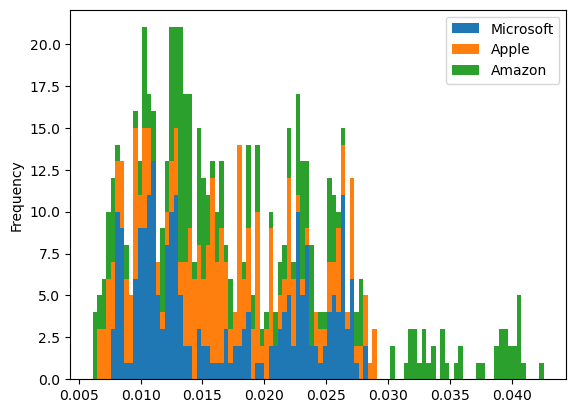

In [81]:
# Calculate rolling standard deviation
port_rol_std = daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
port_rol_std.plot.hist(stacked=True, bins = 100)

### Calculate and plot the correlation

<Axes: >

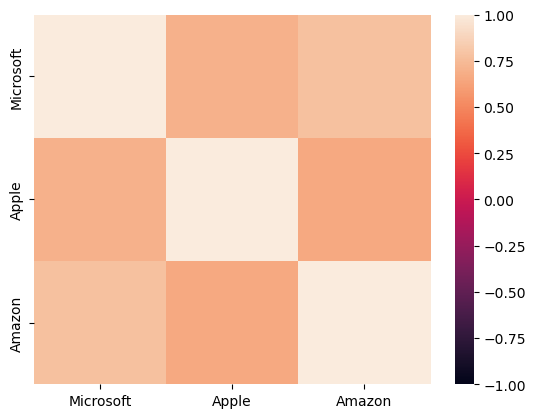

In [82]:
# Calculate and plot the correlation
# Calculate the correlation
correlation = daily_returns.corr()
correlation
# Display de correlation matrix

sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta
covariance = daily_returns.cov(Combined_Returns["S&P500 Returns"])
# Calculate variance of S&P 500
variance = Combined_Returns["S&P500 Returns"].var()

# Computing beta
Algo1_Beta = Covariance/Variance

# Plot beta trend


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [84]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_por = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())

<Axes: >

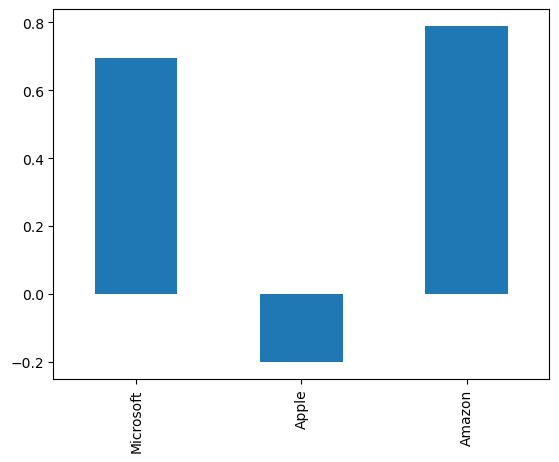

In [85]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_por.plot.bar()

### How does your portfolio do?

Write your answer here!

In [ ]:
# It does not outperform Algo1 and 2